In [1]:
pip install split_folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import splitfolders

In [4]:
input_folder="/content/drive/MyDrive/dummy_sugarcane"
output="/content/final"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.8,.1,.1))

Copying files: 1500 files [00:24, 61.58 files/s] 


In [5]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
import keras 
from keras.preprocessing.image import ImageDataGenerator

In [7]:
img_height,img_width=224,224
batch_size=32
train='/content/final/val'
valid='/content/final/train'
test='/content/final/test'

In [8]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 1200 files for training.


In [9]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 1500 files belonging to 4 classes.
Using 300 files for validation.


In [10]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19


In [11]:
base_model=VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')

80134624/80134624 [==============================] - 1s 0us/step


In [12]:
for layer in base_model.layers:
  layer.trainable=False

In [13]:
X = Flatten()(base_model.output)
X = Dense(units=4,activation='softmax')(X)
model1=Model(base_model.input,X)

In [14]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model1.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [16]:
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  
)

Epoch 1/10
38/38 [==============================] - 29s 299ms/step - loss: 5.5664 - accuracy: 0.7150 - val_loss: 3.0679 - val_accuracy: 0.8467
Epoch 2/10
38/38 [==============================] - 8s 194ms/step - loss: 0.5116 - accuracy: 0.9533 - val_loss: 1.8615 - val_accuracy: 0.9000
Epoch 3/10
38/38 [==============================] - 8s 191ms/step - loss: 0.0642 - accuracy: 0.9908 - val_loss: 1.4639 - val_accuracy: 0.8967
Epoch 4/10
38/38 [==============================] - 8s 193ms/step - loss: 0.0495 - accuracy: 0.9917 - val_loss: 1.5546 - val_accuracy: 0.8833
Epoch 5/10
38/38 [==============================] - 8s 200ms/step - loss: 0.0680 - accuracy: 0.9917 - val_loss: 1.5071 - val_accuracy: 0.9067
Epoch 6/10
38/38 [==============================] - 8s 194ms/step - loss: 0.0270 - accuracy: 0.9950 - val_loss: 1.4056 - val_accuracy: 0.9200
Epoch 7/10
38/38 [==============================] - 8s 198ms/step - loss: 0.1919 - accuracy: 0.9833 - val_loss: 2.3532 - val_accuracy: 0.8767
Epoch

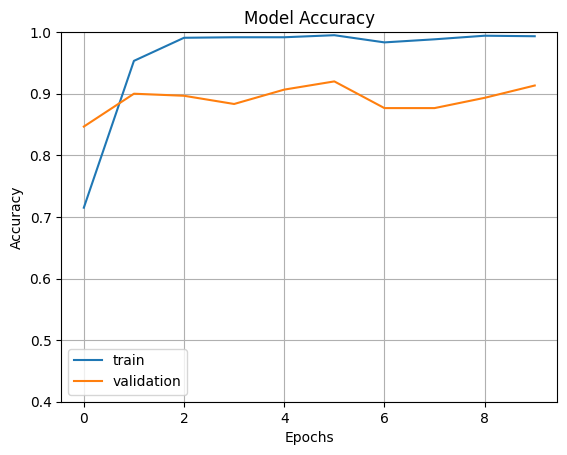

In [17]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
model1.save('vgg19_m')
loaded_1 = tf.keras.models.load_model(
    "vgg19_m")

In [19]:
tf.keras.models.save_model(model1,'/content/drive/MyDrive/vgg19_m.h5')

In [ ]:
loaded=tf.keras.models.load_model('/content/drive/MyDrive/vgg19_m.h5')